In [1]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
# Step 2: Import Dataset
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('insurance.csv')

Saving insurance.csv to insurance.csv


In [3]:
# Step 3: Exploratory Data Analysis
print("First 5 rows of the dataset:")
print(df.head())
print("\n-----------------------------------\n")

print("Dataset Information:")
df.info()
print("\n-----------------------------------\n")

print("Statistical Summary:")
print(df.describe())
print("\n-----------------------------------\n")

print("Missing Values Check:")
print(df.isnull().sum())

First 5 rows of the dataset:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

-----------------------------------

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB

-------

In [4]:
# Step 4: Feature Engineering
# This dataset is clean, but the code below demonstrates how to handle missing values if they existed.
# Impute numerical with mean
for col in df.select_dtypes(include=np.number).columns:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mean())

# Impute categorical with mode
for col in df.select_dtypes(include='object').columns:
     if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])

# Convert categorical columns to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True, dtype=int)

print("Data after converting categorical columns:")
print(df.head())

Data after converting categorical columns:
   age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400         0           1                 0   
1   18  33.770         1   1725.55230         1           0                 0   
2   28  33.000         3   4449.46200         1           0                 0   
3   33  22.705         0  21984.47061         1           0                 1   
4   32  28.880         0   3866.85520         1           0                 1   

   region_southeast  region_southwest  
0                 0                 1  
1                 1                 0  
2                 1                 0  
3                 0                 0  
4                 0                 0  


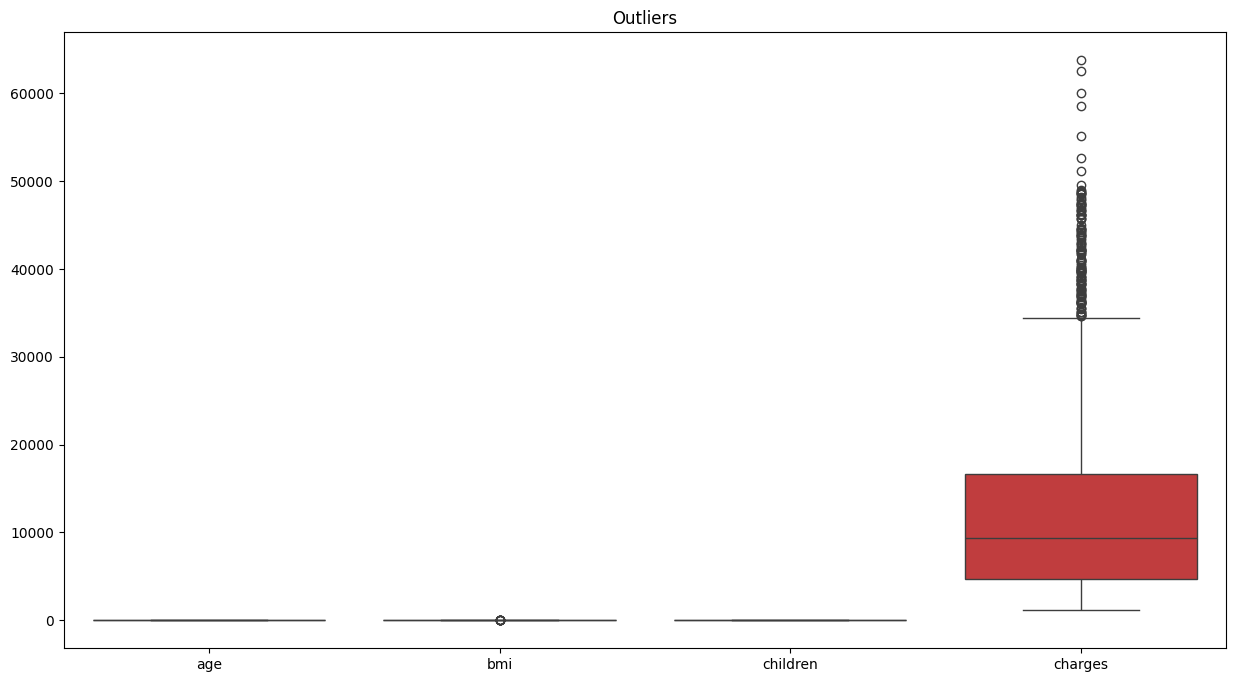

In [5]:
# Step 5: Check and Handle Outliers
numerical_cols = ['age', 'bmi', 'children', 'charges']

# Use box plot to show outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[numerical_cols])
plt.title('Outliers')
plt.show()
# For this project, we will proceed with the original dataframe (df)
# as Random Forest handles outliers well.

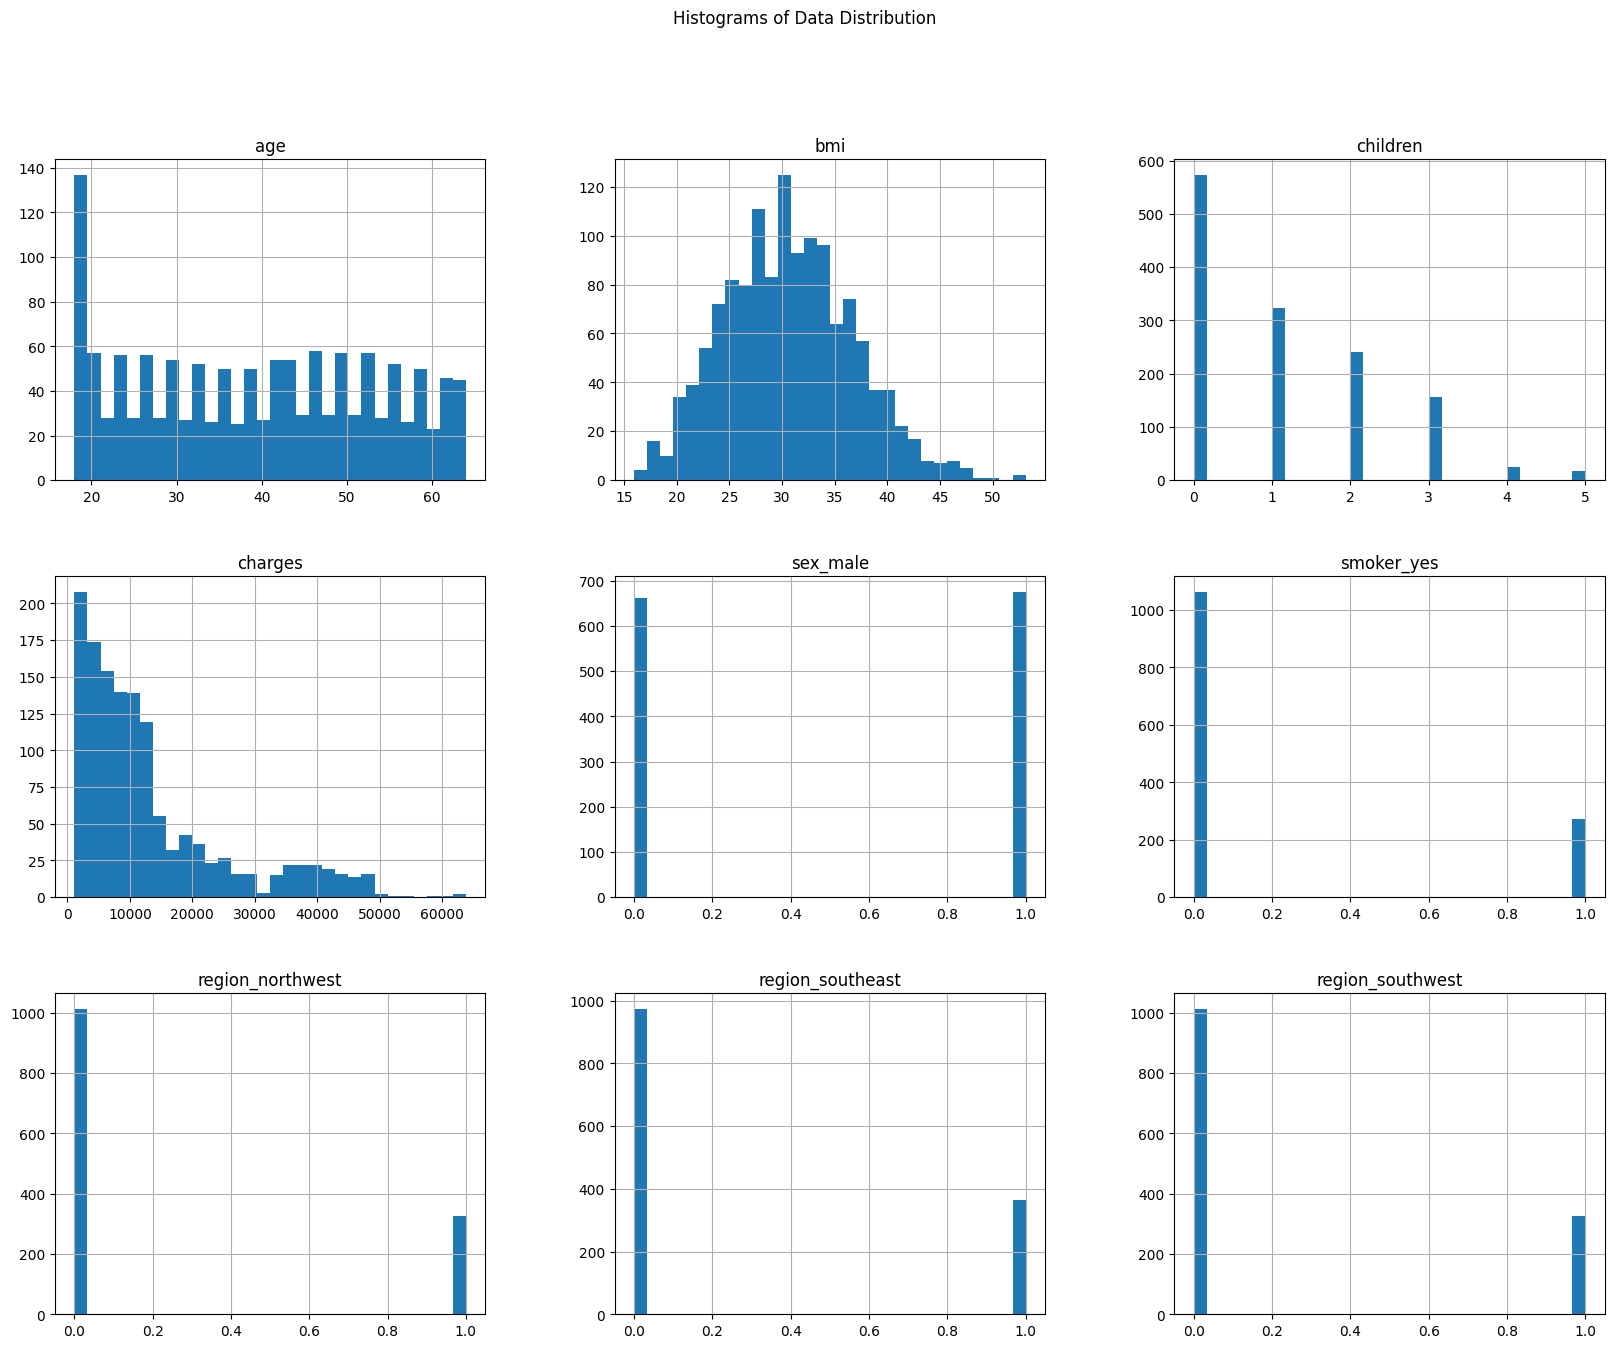

In [6]:
# Step 6: Use histograms to show the distribution of the data
df.hist(bins=30, figsize=(20, 15))
plt.suptitle('Histograms of Data Distribution')
plt.show()

In [7]:
# Step 7: Declare feature vector and target variable
X = df.drop('charges', axis=1)
y = df['charges']

In [8]:
# Step 8: Split data into separate training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Step 9: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Step 10: Model training with Random Forest Regressor
# n_estimators=100 means the forest will be built from 100 decision trees.
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, oob_score=True)
rf_model.fit(X_train_scaled, y_train)

# The Out-of-Bag score is a great way to check model performance without a separate validation set
print(f'Out-of-Bag (OOB) Score: {rf_model.oob_score_:.4f}')

Out-of-Bag (OOB) Score: 0.8283


In [11]:
# Step 11: Predict results and check performance metrics
y_pred = rf_model.predict(X_test_scaled)

print('--- Model Performance on Test Set ---')
print('R-squared:', metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

--- Model Performance on Test Set ---
R-squared: 0.8656055394920775
Mean Absolute Error (MAE): 2543.9758251029275
Mean Squared Error (MSE): 20864569.513376206
Root Mean Squared Error (RMSE): 4567.775116331386


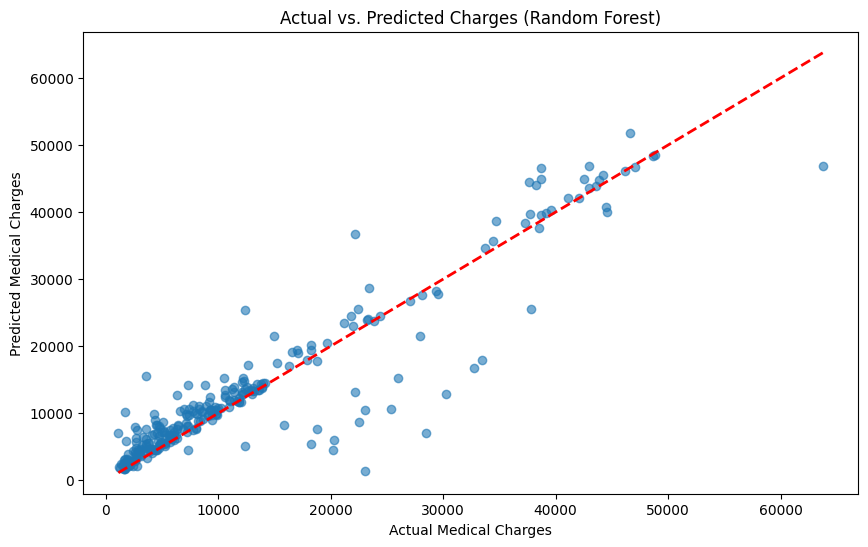

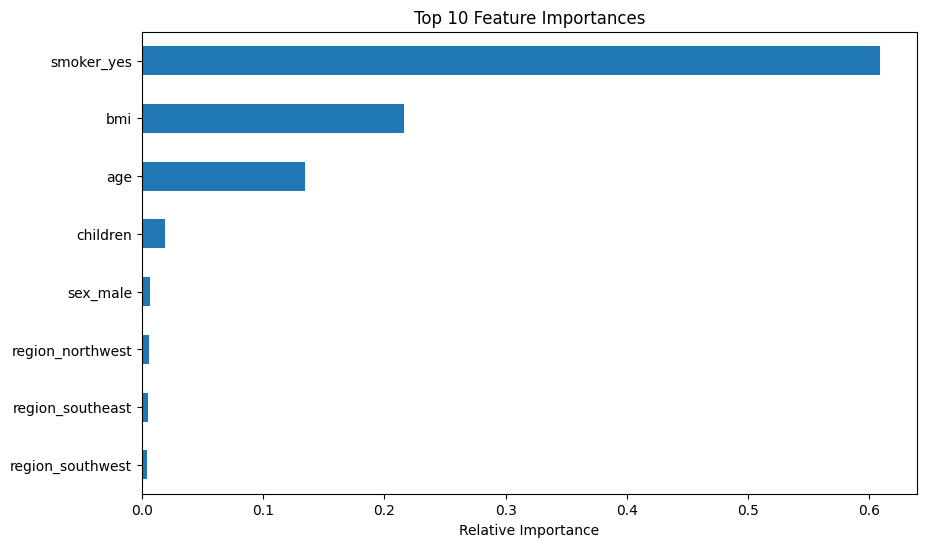

In [12]:
# Step 12 - Visualization 1: Predictions vs Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Medical Charges')
plt.ylabel('Predicted Medical Charges')
plt.title('Actual vs. Predicted Charges (Random Forest)')
plt.show()

# Step 12 - Visualization 2: Feature Importance
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 6))
feature_importances.nlargest(10).sort_values().plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.xlabel('Relative Importance')
plt.show()